1.Dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
+ "telecom_churn.csv")
df.head()
#churn is a binary variable, true means the company lost the costumer,
#false that they were retained

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

2. Univariate visualization

In [5]:
#looks at one feature at the time. When we analyze the feature independently, we are
#mostly interested in teh distribution of it's values and ignore other features 

2.1. Quantitative Features

In [6]:
#Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually
#  express a count or a measurement.

2.1.1. Histograms and Density Plots

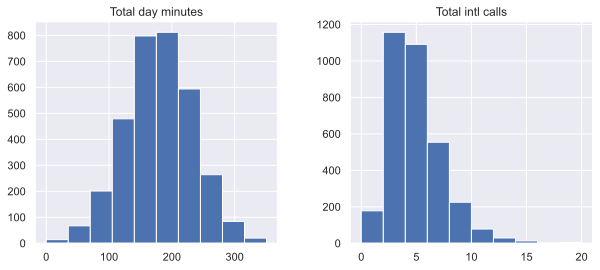

In [7]:
#it's the easiest way to look at distribution of a numerocal variable
#the shape of the histogram gives clues to the distribution type
#hist groups values into bins of equal value range

features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));



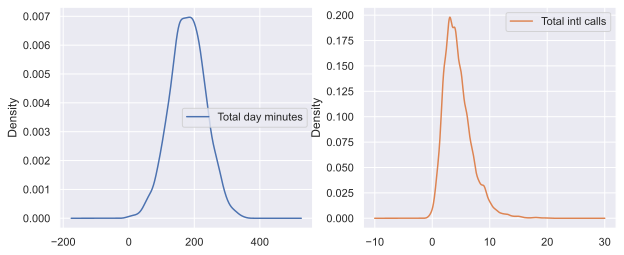

In [8]:
#Kernel Density Plots are a smoother version of the histogram
#Main Advantage is that they don't depend on the size of bins

df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

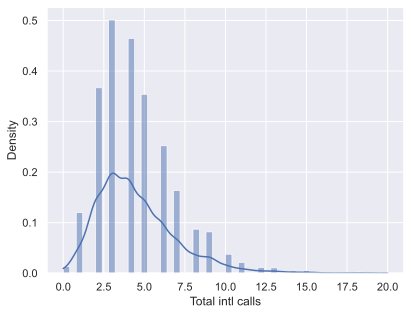

In [9]:
#plot distribution with seabon's histplot

sns.histplot(df["Total intl calls"], kde=True, stat="density");

2.1.2. BOX PLOT

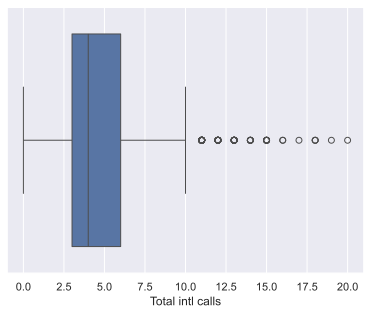

In [10]:
#the individual points are called "outliers"
#the box by itself illustrates the interquartile spread of the distribution
#lenght measured by the 25th (Q1) and 75th (Q3) percentiles
#the vertical line inside the box marks the median (50%) of the distribution
#the whiskers are lines extending from the box
#represent the entire scatter of data point, specifically points within the intervals
#Q1 - 1.5 x IQR , Q3 + 1.5 x IQR, where IQR = Q3-Q1
#outliers falling outside the ranged bounded by the whiskers are plotted individually

sns.boxplot(x="Total intl calls", data=df);

2.1.3. VIOLIN PLOT

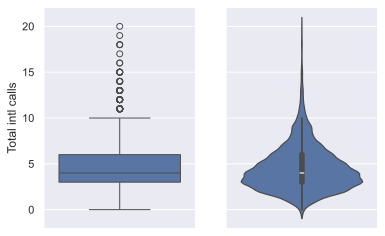

In [11]:
#violin plot concentrates more on the smoothed distribution as a whole
#while box/violin plots pn certain statistics concerning individuals

_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

2.1.4 DESCRIBE ()

In [12]:
#In addition to graphical tools, in order to get the exact numerical
#statistics of the distribution, we can use the method
#describe() of a DataFrame

df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

2.2. CATEGORIAL AND BINARY FEATURES

In [13]:
#take a fixed number of values
#each value assign an observation to a corresponding group, known as CATEGORY
#binary features can only have 2 values
#if the values of a categorial variable are ordered, it's called ordinal

2.2.1. FREQUENCY TABLE

In [14]:
#checking the balance of the dataset of the target variable: churn rate

df["Churn"].value_counts()

#loyal and disloyal customers aren't represented equally, this data not balanced

Churn
False    2850
True      483
Name: count, dtype: int64

2.2.2. BAR PLOT

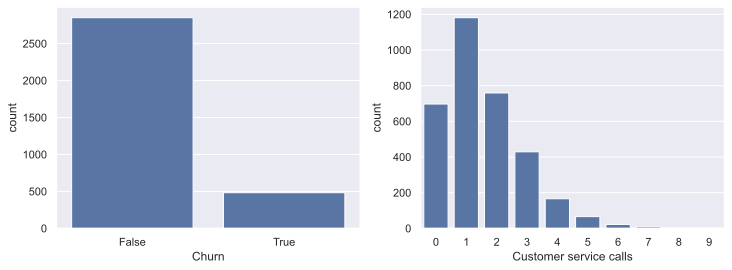

In [15]:
#graphical representation of the frequency table
#plotting distributions for two categorical variables

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

#Histograms are best suited for looking at the distribution of numerical variables-
#-bar plots are for categorial features
#the values on the x-axis in the histogram are numerical, a bar plot can have-
#-any type of values on that axis (numbers, strings, booleans)

3. MULTIVARIATE VISUALIZATION

In [16]:
#Allows us to see relationships between two and more different varaibles in-
#-one figure

3.1. QUANTITATIVE VS QUANTITATIVE

3.1.1. CORRELATION MATRIX

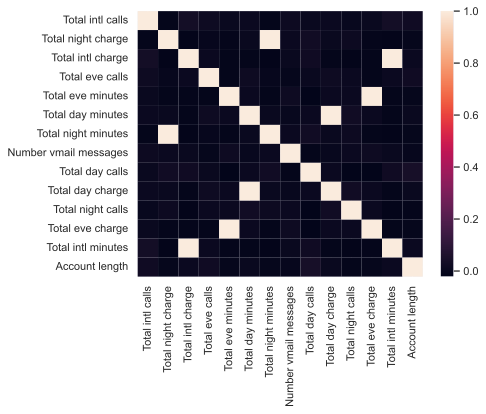

In [ ]:
#lets look at correlations among numberical varaibles in out dataset 
#it's important to know there are machine learning algorithms taht do not handle
#-highly correlated imput values well
#the corr() method calculates the correlation between each pain of features
#passing the matrix to heatmap() rendes a color coded matrix

# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);


In [18]:
#4 variables like Total day charge have been calculated directly from the number
#-of minutes spent on phone calls (total day minutes)
#these are called dependent varaibles and can be left out since they don't 
#-provide additional information

numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

3.1.2. SCATTER PLOT

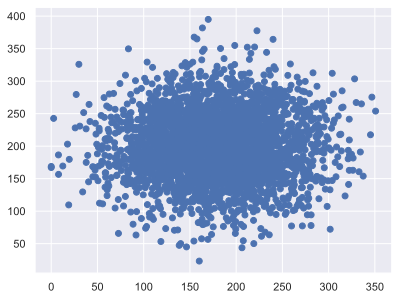

In [19]:
#displays values of two numerical variables as Catesian coordinates in 2D space

plt.scatter(df["Total day minutes"], df["Total night minutes"]);

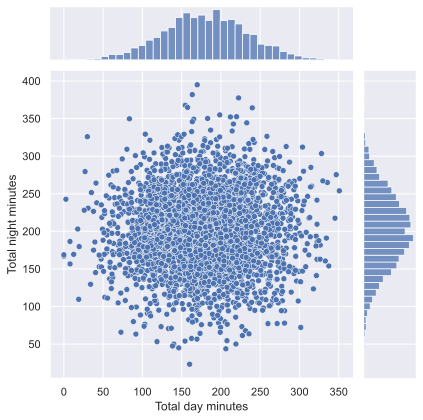

In [20]:
#seems that these features are uncorrelated because the ellopse like shape 
#-is aligned in with the axes
#there's a fancier option to create a scatter plot
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

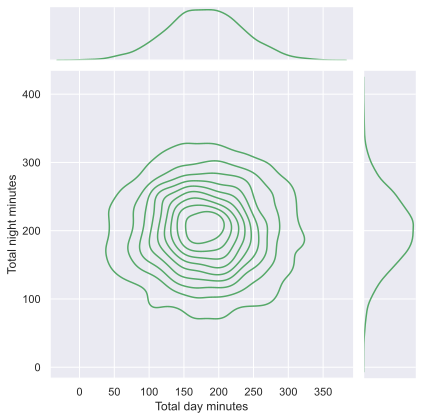

In [21]:
#using function jointplot()) plots two histograms 
#using same function, we can get smoothed version of our bivariate distribution

sns.jointplot(
    x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g"
);

3.1.3. SCATTERPLOT MATRIX

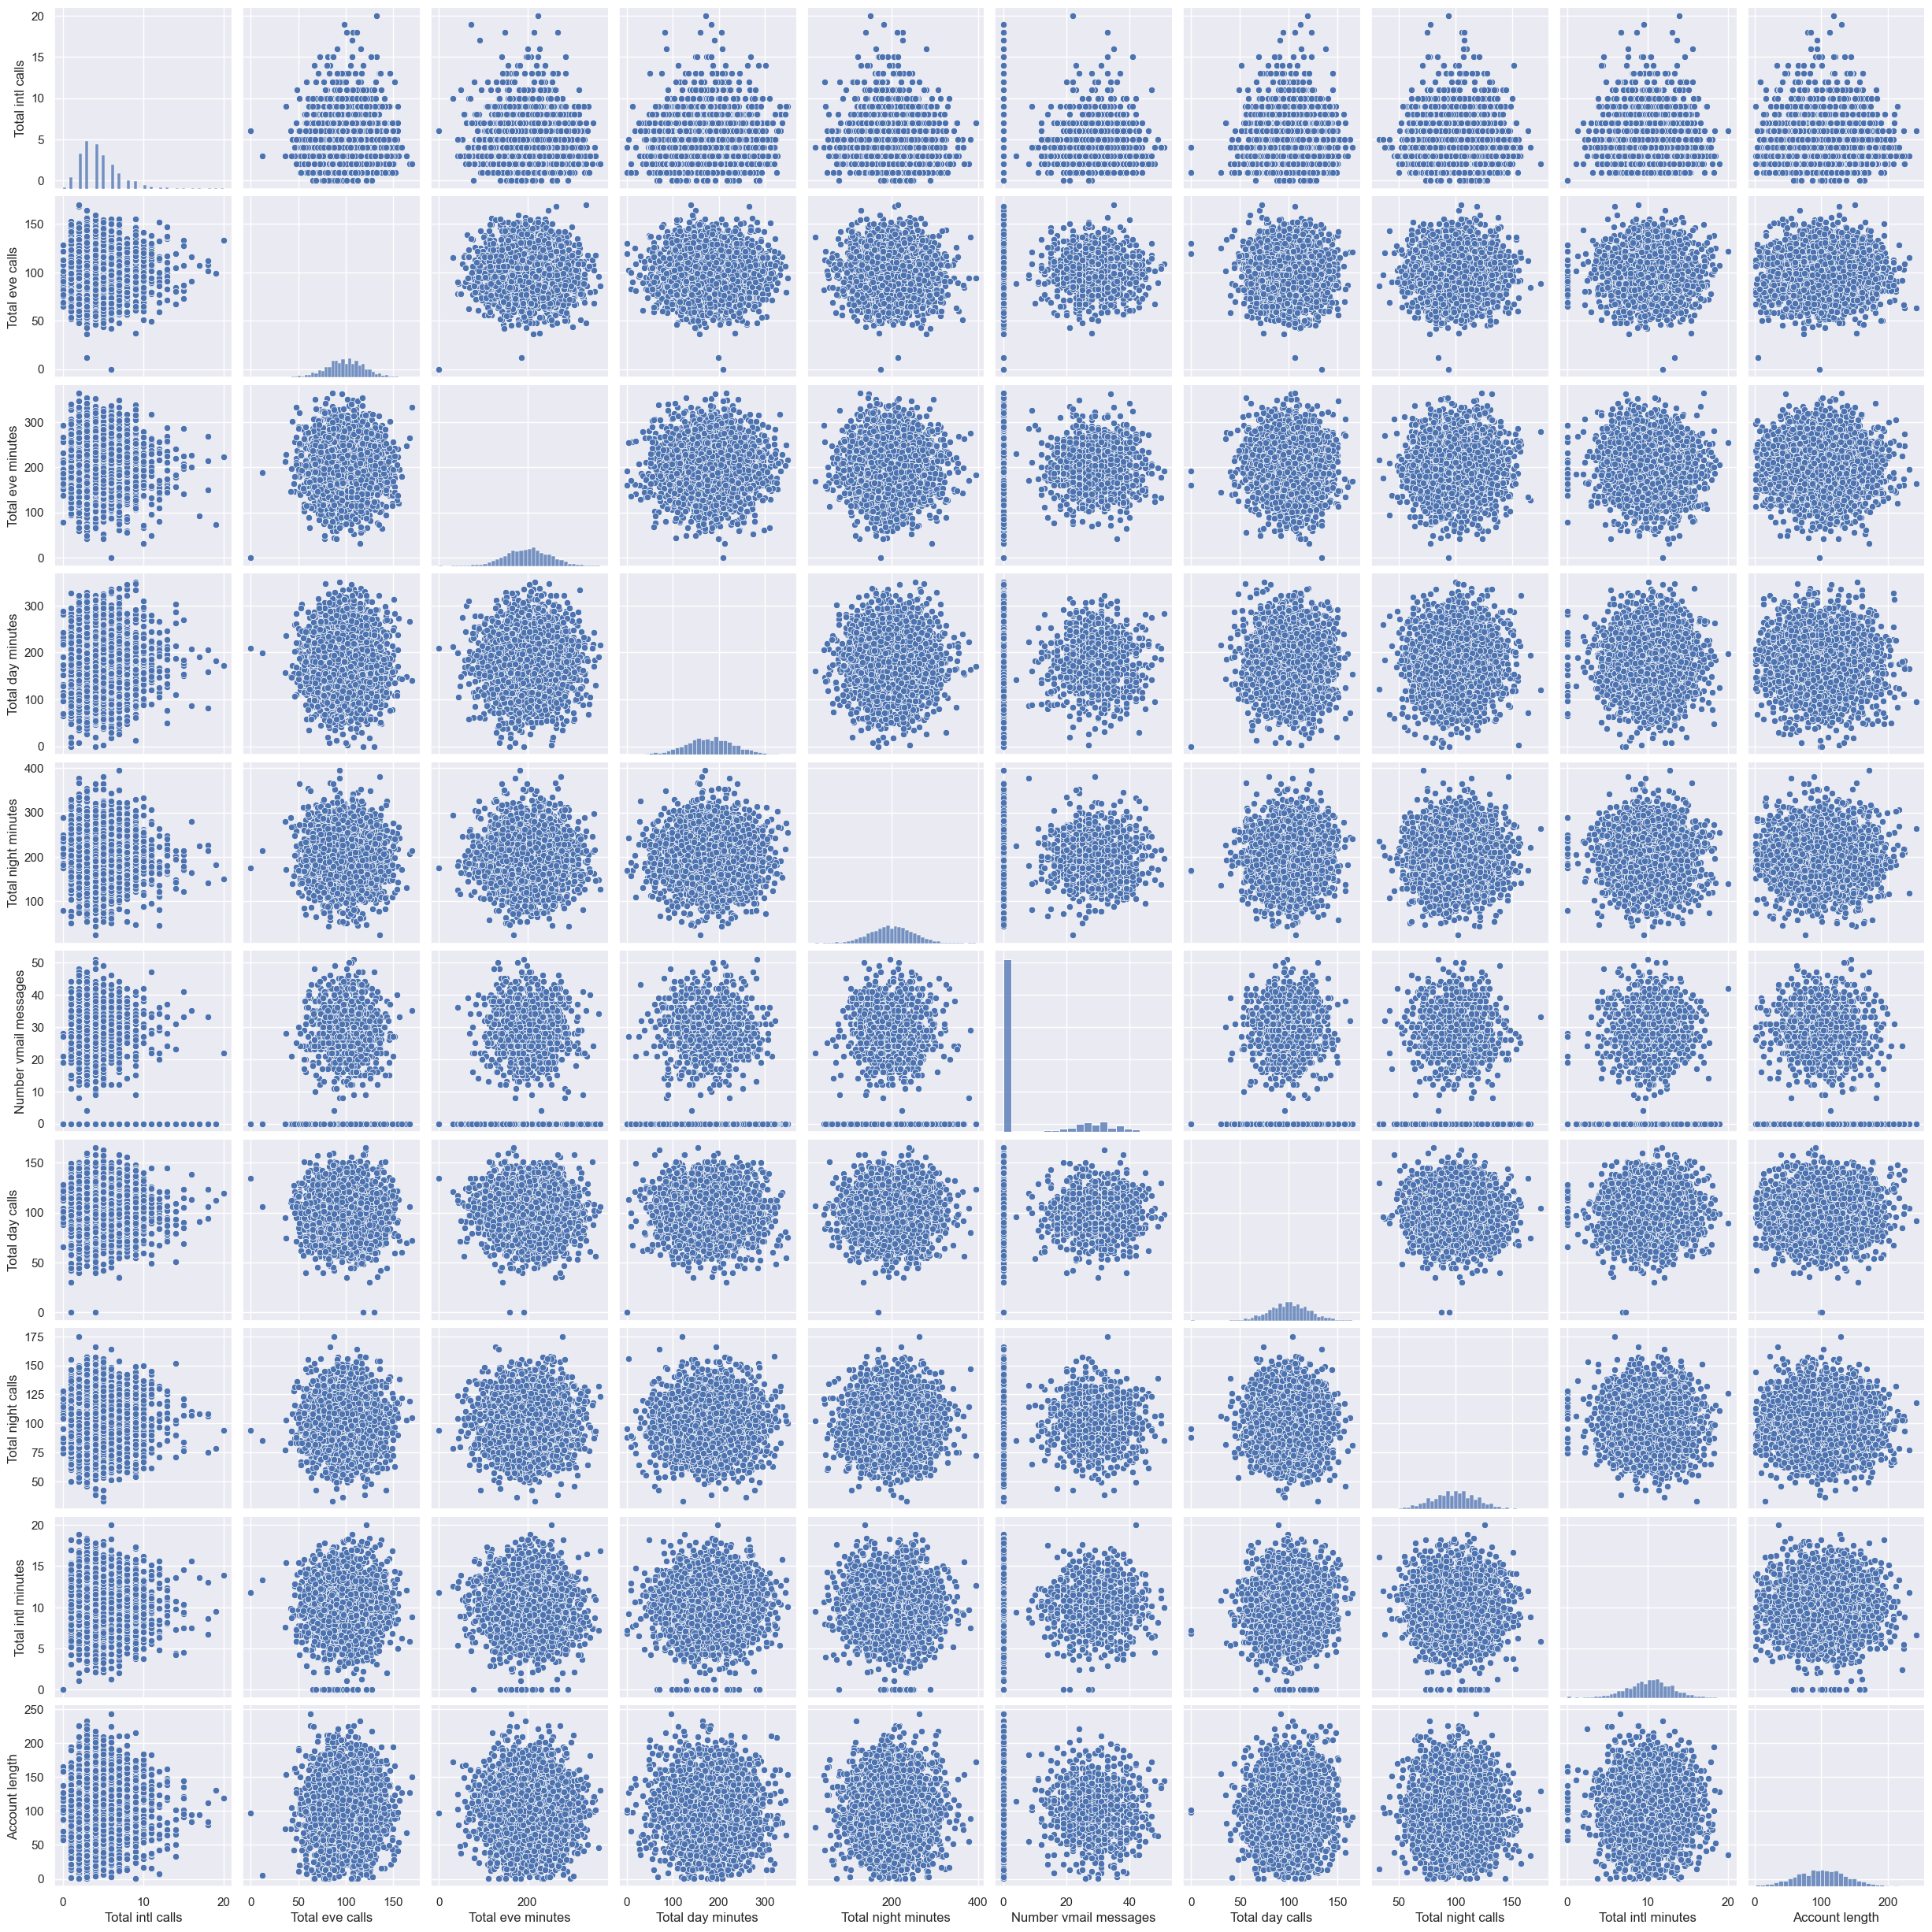

In [22]:
#the diagonal contains the distribution of the corresponding variables
#the scatter plots for each pair of varaibles

# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [24]:
%config InlineBackend.figure_format = 'svg'

#may help draw conclusions about that, but in this case everything is clear

3.2. QUANTITATIVE VS CATEGORIAL

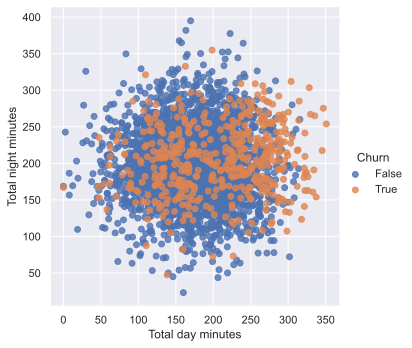

In [ ]:
sns.lmplot(
    x="Total day minutes", y="Total night minutes", data=df, hue="Churn", 
    fit_reg=False
);


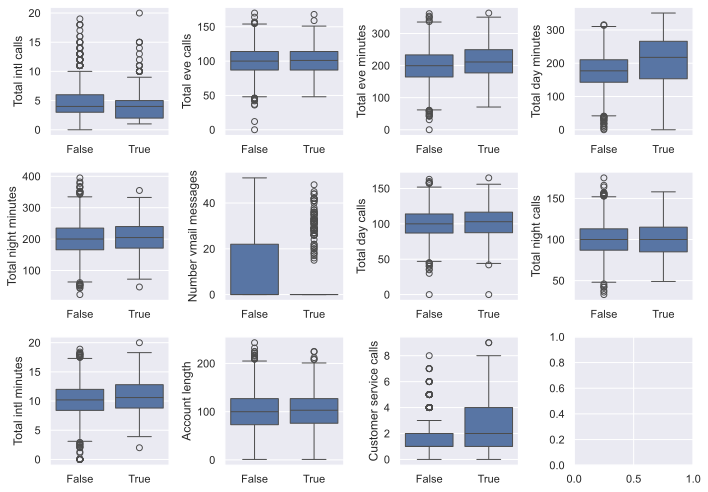

In [27]:
#the data isn't clear enough and we can't make definite conclusions
#we create box plots to visualize the distribution statistics of the numerical variables 
#in two disjoint groups: the loyal(churn true) and disloyal(churn false) costumers

# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

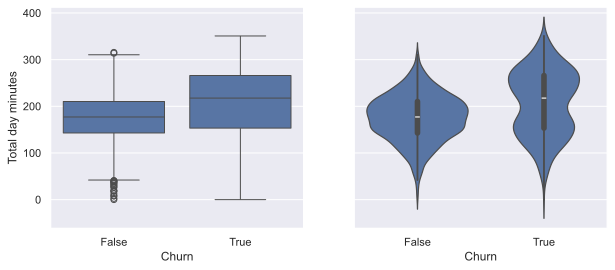

In [28]:
#distribution of day minutes spoken for the loyal and disloyal costumers separately
#we create box and violin plots for total day minutes grouped by target variable

_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

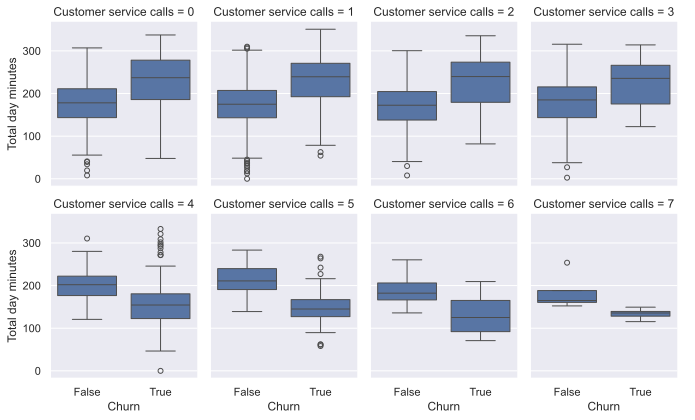

In [ ]:
#In this case, the violin plot does not contribute any additional information
#disloyal customers tend to talk on the phone more
#when we want to analyze a quantitative variable in two categorial dimensions at once

sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

#we conclude that starting with 4 calls, total day minutes may no longer
#be the main factor for costumer churn

3.3. CATEGORICAL VS CATEGORICAL

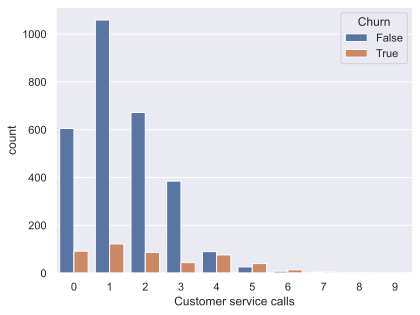

In [30]:
#variable customer service has few unique values, thus is either numerical or ordinal
#distribution of the number of calls to customer service

sns.countplot(x="Customer service calls", hue="Churn", data=df);

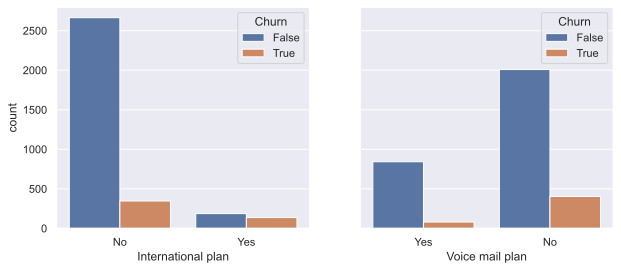

In [ ]:
#relationship between churn and the binary features,
#international plan and voicemail plan 

_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

#when international plan is enabled, churn rate is much higher
#not the same case with voice mail plan

3.3.1. CONTINGENCY TABLE

In [32]:
pd.crosstab(df["State"], df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [35]:
df.groupby(["State"])["Churn"].agg(["mean"]).sort_values(
    by="mean", ascending=False).T

State        CA        NJ    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        WA        NV        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

4. WHOLE DATASET VISUALIZATIONS´

4.1. A NAIVE APPROACH

In [36]:
#What if we want to display all the features and still be able to interpret the data
#we use hist() or create a scatterplot matrix with pairplot() for the whole dataset
#to look at all our features simultaneously
#when number of features if high, this method becomes slow and inefficient

4.2. DIMENSIONALITY REDUCTION

In [37]:
#to look at a dataset as a whole, we need to decrese the numnber of dimensions used
#in visualization without losing much information about the data
#this task is called dimensionality reduction

4.3. T-SNE

In [39]:
#T-SNE means t-distributed stochastic neighbor embedding
#find a projection for a high-dimensional feature space onto a plane
#search for a new and less-dimensional data representation that preserves neighborship
#we need to import additional classes

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [40]:
#leave out churn and state features and convert the values y/n into a numerical value

X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [41]:
#normalize this data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
#building t-sne representation

%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: total: 0 ns
Wall time: 121 μs


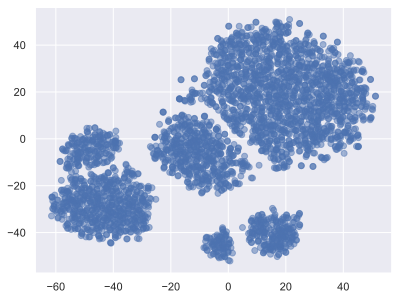

In [45]:
#plotting it
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

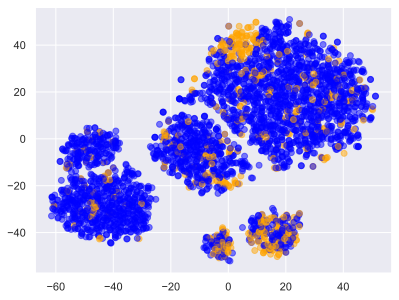

In [47]:
#color t-sne according to the churn (blue for loyal, orange for disloyal)

plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

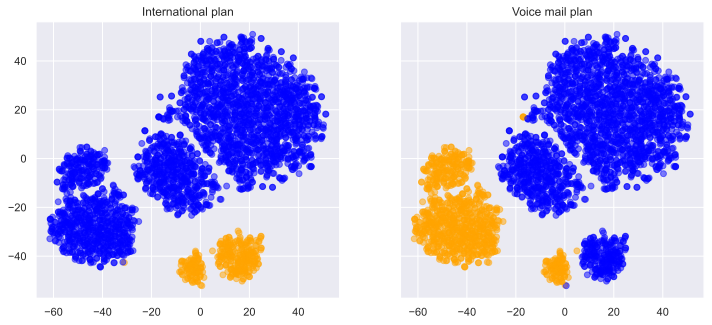

In [48]:
#to understand the picture better, we can color it with the remaining binary features:
#international plan and voicemail

_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);



In [ ]:
#Now it is clear that, for example, many dissatisfied customers who canceled their subscriptions are crowded together in one cluster, representing the people with the international plan
#  but no voice mail.

#disadvantages of t-sne:
#high computational complexity
#the plot can change a great deal depending on the random seed